<hr>

##### Mount Drive - **Google Colab Only Step**

When using google colab in order to access files on our google drive we need to mount the drive by running the below python cell, then clicking the link it generates and pasting the code in the cell.



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Change Directory To Access The Dependent Files - **Google Colab Only Step**

In [0]:
directory = "student"
if (directory == "student"):
  %cd drive/My\ Drive/Colab\ Notebooks/data-science-track/
else:
  %cd drive/Shared\ drives/Rubrik/Data\ Science/Course/Data-Science-Track

/content/drive/Shared drives/Rubrik/Data Science/Course/Data-Science-Track


# Data Cleaning
Data cleansing or data cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.

Better data beats better algorithms.
* Use this as a "blueprint" for efficient data cleaning.
* Different types of data will require different types of cleaning.
* However, the systematic approach laid out in this lesson can always be a good starting point.


<br><hr id="toc">

### In this lesson...

In this lesson, we'll cover the essential data cleaning steps:
- [Understanding the data](#examine)
- [Drop unwanted observations](#drop)
- [Fix structural errors](#structural)
- [Remove unwanted outliers](#outliers)
- [Label missing categorical data](#missing-categorical)
- [Flag and fill missing numerical data](#missing-numeric)

Finally, we'll save the cleaned dataframe to a new file so we can use it in other lessons.

<br><hr>

## Understanding The Data 
### Import libraries 

In general, it's good practice to keep all of your library imports at the top of your notebook or program.

In [0]:
# Data
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Library Configurations: 
sns.set() # make seaborn override the styling of matplotlib graphs
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.max_rows', None) # display all rows

## Import the real estate dataset
- Use pandas' `read_csv()` function 
- Provide the following path for the data 
```python 
path = './data/real_estate_data.csv'
```

In [0]:
# Load real estate data from CSV
df = pd.read_csv('./data/real_estate_data.csv')

<hr>

<br id="examine">

## Understanding The Data

The initial step must always include some sort of examination of the structure of your dataset, this is to give you an idea of what columns / rows need to be cleaned / dropped.
<br>

### Display the dimensions of the dataset.
- Use the `.shape` property of the DataFrame to find out the shape of the dataset

In [0]:
# Dataframe dimensions
df.shape

(1883, 26)

### Display the data types of our features
- Use the DataFrame's `info()` method to find out more about the DataFrame, such as the column data types and column names 

In [0]:
# Column datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Data columns (total 26 columns):
tx_price              1883 non-null int64
beds                  1883 non-null int64
baths                 1883 non-null int64
sqft                  1883 non-null int64
year_built            1883 non-null int64
lot_size              1883 non-null int64
property_type         1883 non-null object
exterior_walls        1660 non-null object
roof                  1529 non-null object
basement              1657 non-null float64
restaurants           1883 non-null int64
groceries             1883 non-null int64
nightlife             1883 non-null int64
cafes                 1883 non-null int64
shopping              1883 non-null int64
arts_entertainment    1883 non-null int64
beauty_spas           1883 non-null int64
active_life           1883 non-null int64
median_age            1883 non-null float64
married               1883 non-null float64
college_grad          1883 non-null float64


#### What columns are text, or classified as categorical data? 

- property_type
- exterior_walls
- roof

### Display the first 5 rows to see example observations
- Use the DataFrame's `head()` method to display the first 5 rows of the data set

In [0]:
# Display first 5 rows of df
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


## Show Distributions Of Numeric Features
- Use the DataFrame's `hist` method to create a histogram for each numerical features 

#### Arguments to consider passing in:
- (optional) `bins:` splits the data into groups based on the number specified 
- (optional) `xrot:` rotates x-axis labels counter-clockwise; <span style="color:red"> really useful for long x index labels </span>
- (optional) `figsize`: (float, float) width, height in inches.
- (optional) `color:` colors the histogram with one of these values {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}

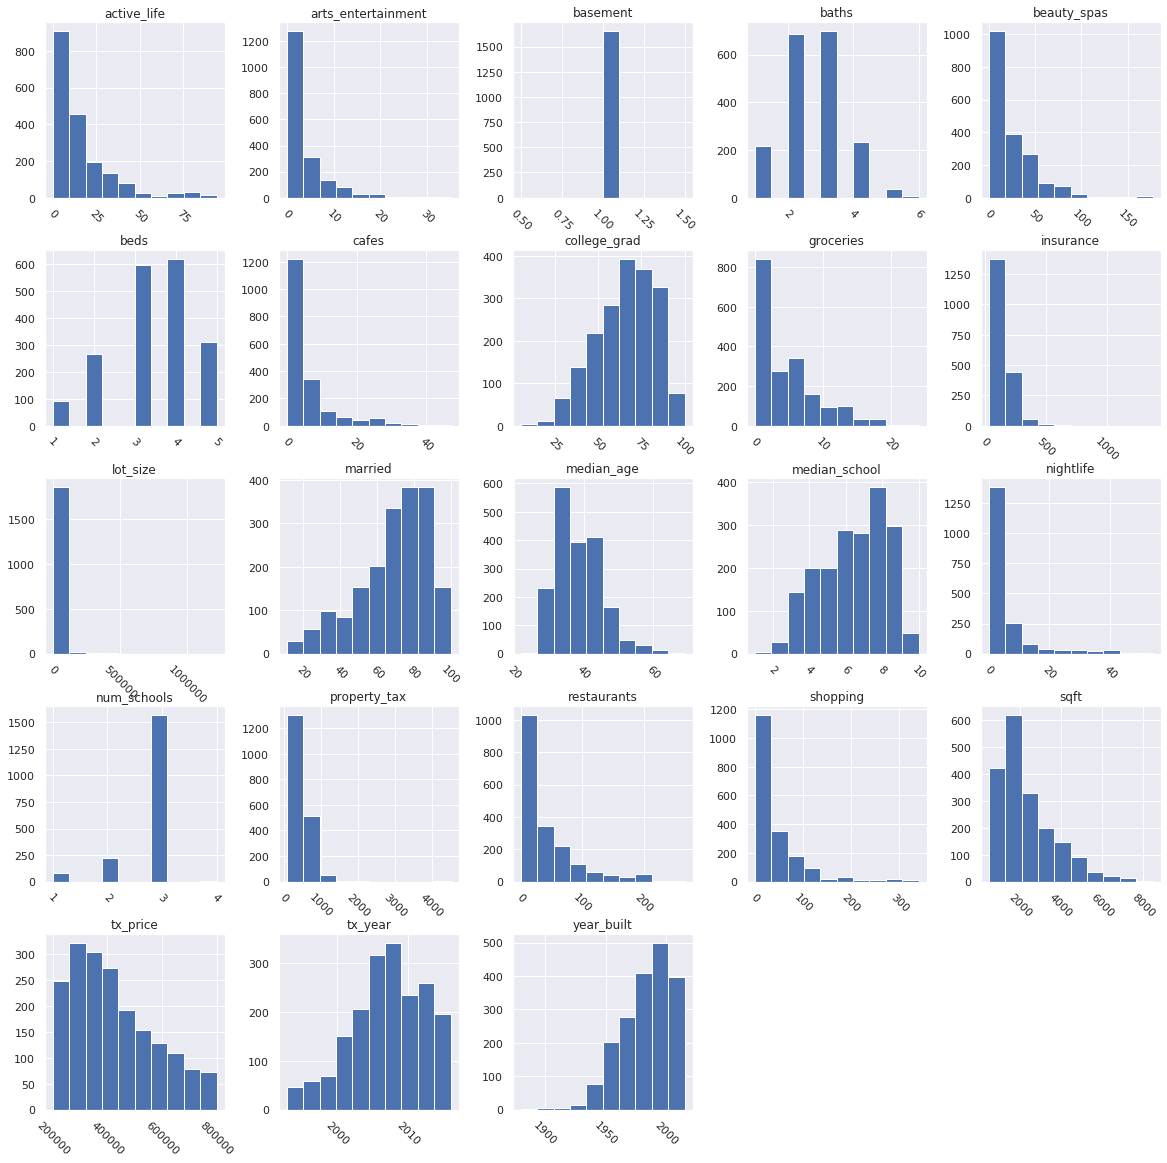

In [0]:
df.hist(xrot=-45, figsize=(20, 20))
plt.show()

## Show Distributions of Categorical Features

Let us create a new DataFrame to hold only the categorical features of the real_estate DataFrame. 

We will do this using the Pandas DataFrame `select_dtypes()` method.

#### `.select_dtypes()` parameters: 
- `input`: a selection of dtypes or strings to be included/excluded. At least one of these parameters must be supplied.

#### Commonly used Data Types
- `np.number` or `number`: to select all numeric types,
- `object`: to select strings, but note that this will return all object dtype columns
- [Data Types Reference](https://docs.scipy.org/doc/numpy/reference/arrays.scalars.html)

#### Generic example
```python
  categorical_df = df.select_dtypes(include="object")
```

In [0]:
# Filter by Columns
cat_df = df.select_dtypes(include="object")

#### Print out the first 5 rows of the new categorical DataFrame

In [0]:
cat_df.head()

,property_type,exterior_walls,roof
0,Apartment / Condo / Townhouse,Wood Siding,NaN
1,Apartment / Condo / Townhouse,Brick,Composition Shingle
2,Apartment / Condo / Townhouse,Wood Siding,NaN
3,Apartment / Condo / Townhouse,Wood Siding,NaN
4,Apartment / Condo / Townhouse,Brick,NaN


### Let's loop through our categorical DataFrame and show each of the feature's distributions

When we loop through (iterate over) a pandas DataFrame we will access the column (feature) names. 

This is useful because now we are not hard coding feature names for desired operations on multiple columns of data. 

Once we have access to the feature name let us do the following:
- show the distribution of the feature by creating a countplot using `sns.countplot()` 
- print the value counts of each feature using the Series' `value_counts()` method 
- print a blank line 

#### sns.countplot() parameters:
- (optional) `x` (string: series name): specify the values for the x axis
- (optional) `y` (string: series name): specify the values for the y axis
- `data` (DataFrame, array, or list of arrays): Dataset for plotting


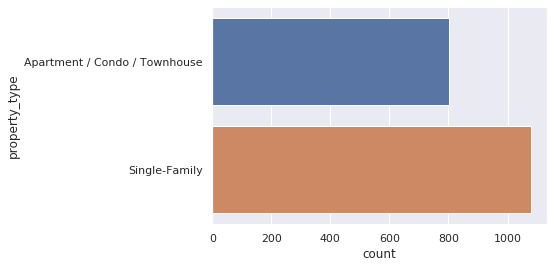

Single-Family                    1080
Apartment / Condo / Townhouse     803
Name: property_type, dtype: int64



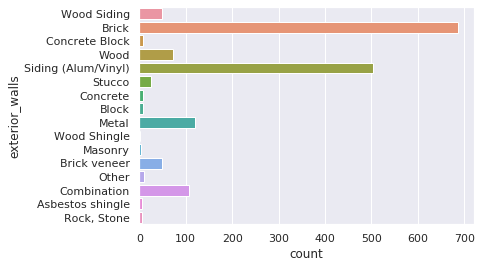

Brick                  687
Siding (Alum/Vinyl)    503
Metal                  120
Combination            107
Wood                    72
Wood Siding             49
Brick veneer            48
Stucco                  26
Other                   10
Concrete                 8
Concrete Block           7
Block                    7
Asbestos shingle         6
Rock, Stone              5
Masonry                  3
Wood Shingle             2
Name: exterior_walls, dtype: int64



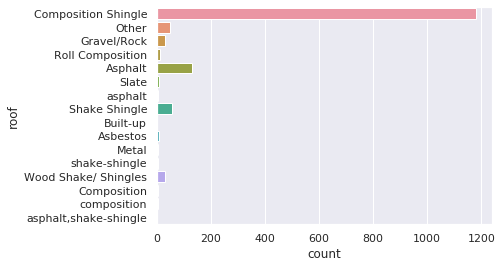

Composition Shingle      1179
Asphalt                   132
Shake Shingle              55
Other                      49
Wood Shake/ Shingles       30
Gravel/Rock                30
Roll Composition           12
Asbestos                    9
Slate                       9
asphalt                     5
Composition                 5
Metal                       4
composition                 4
shake-shingle               3
Built-up                    2
asphalt,shake-shingle       1
Name: roof, dtype: int64



In [0]:
for feature_name in cat_df: 
    sns.countplot(y=feature_name, data=df)
    plt.show()
    print(cat_df[feature_name].value_counts())
    print()

<br id="drop">

## Drop unwanted observations

The first step to data cleaning is removing unwanted observations from your dataset.

There could be many reasons for droping certain observations such as removing duplicates and outliers

### Drop all duplicate observations using the DataFrame's `drop_duplicates()` method

#### `drop_duplicates()` parameters: 
- `subset` (string): Subset takes a column or list of column label. It’s default value is none. After passing columns, it will consider them only for duplicates.
-`keep` (string): keep is to control how to consider duplicate value. It has only three distinct value and default is ‘first’.
  - If ‘first’, it considers first value as unique and rest of the same values as duplicate.
  - If ‘last’, it considers last value as unique and rest of the same values as duplicate.
  - If False, it consider all of the same values as duplicates
- `inplace` (boolean): default False, Whether to drop duplicates in place or to return a copy

**Return type**: DataFrame with removed duplicate rows depending on Arguments passed. i.e. if inplace == True then nothing will be returned 

#### Generic Example: 
```python 
 df = df.drop_duplicates()

 # inplace example
  df.drop_duplicates(inplace=True)
```

#### Try It Out
- check the shape of the real estate DataFrame
- drop duplicates with the inplace argument set as true
- check the shape of the real estate DataFrame

In [0]:
# Print shape of dataframe
print(df.shape)

# Drop any duplicates
df.drop_duplicates(inplace=True)

# Print shape of new dataframe to compare
print(df.shape)

(1883, 26)
(1883, 26)



<div style="text-align:center; margin: 40px 0 40px 0;">

[**Back to Contents**](#toc)
</div>

<hr> 

<br id="structural">

## Fix Structural Errors

The next bucket under data cleaning involves fixing structural errors.

Here is a list of some structural errors:
- unwanted values in columns **i.e.** blank values
- outliers in columns
- features (columns) can suffer from sparse classes, meaning features that have a lot of different uniuqe values
- mislabeled classes ( mislabeled values)

<br>

### Let us look at which columns have blank values
We can do this by using the DataFrame's `isnull()` method.

The `isnull()` method will return a DataFrame. This DataFrame will be fulled with boolean values. All columns will be a boolean series identifying `False` for non-null values and `True` for null values.

We can then chain the `sum()` method on the return of the `isnull()` method. Meaning we will invoke the `isnull()` method on the DataFrame and then we will invoke the `sum()` method on the `isnull()` method.

The sum() operation will count column wise the amount of values that are null (blank), meaning that it will tally how many blank values each column (feature) has.

#### Example
```python 
  df.isnull().sum()
```

In [0]:
df.isnull().sum()

tx_price                0
beds                    0
baths                   0
sqft                    0
year_built              0
lot_size                0
property_type           0
exterior_walls        223
roof                  354
basement              226
restaurants             0
groceries               0
nightlife               0
cafes                   0
shopping                0
arts_entertainment      0
beauty_spas             0
active_life             0
median_age              0
married                 0
college_grad            0
property_tax            0
insurance               0
median_school           0
num_schools             0
tx_year                 0
dtype: int64



### Let us remove blank values from the 'basement' column

#### Let's see the different unique values of the `basement` column
- Use the series' `.unique()` method to display the unique values of the 'basement` column

In [0]:
# Display unique values of 'basement'
df['basement'].unique()

array([nan,  1.])

#### Fill missing <code style="color:steelblue">'basement'</code> values with the value <code style="color:crimson">0</code> to turn <code style="color:steelblue">'basement'</code> into a true `indicator` variable.

We will do this by using the series `fillna()` method.
#### `fillna()` parameters:
- value (scalar, dict, Series, or DataFrame): The value to use to fill holes (e.g. 0)
-inplace (boolean): default False, if `True`, fill in-place

#### Generic Example: 
```python 
 df['feature_name'] = df['feature_name'].fillna(value=0)

 # inplace example
 df['feature_name'].fillna(value=0, inplace=True)
```

#### Fill in missing 'basement' values with 0

In [0]:
# Missing basement values should be 0
df['basement'] = df['basement'].fillna(0)

#### Confirm that we have a true indicator variable for the `basement` series (column):

In [0]:
# Display unique values of 'basement'
df.basement.unique()

array([0., 1.])

<br>

### Clean-up the `roof` column (series)
Earlier in this lesson we mentioned that features (columns) can suffer from  having to many unique values, refered to as noise. This can hurt machine learning algorithms because it will try to learn to seperate or cluster too many unique values. If we can remove the amount of unique values in a series (column) then the machine learning algorithm can perform better.

More features doesn't mean a better machine learning algorithm. Infact it will increase the noise and decrease the efficiency and can result in overfitting.

#### Let us use the `roof` column (series) as an example. Using seaborn's countplot, plot the `roof` distribution.

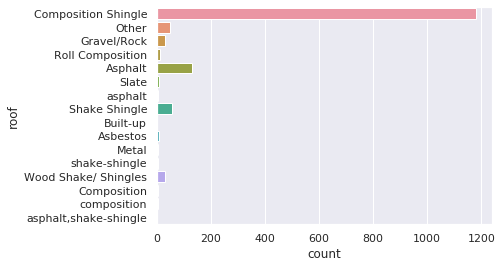

In [0]:
# Class distributions for 'roof'
sns.countplot(y='roof', data=df)
plt.show()

#### Make the following changes:
Notice that there are some typos and inconsistent capitalization in the `roof` feature.

#### Using the series' `replace()` method replace values of a column (series)

#### series' `replace()` method parameters:
- `to_replace` (str, regex, list, dict, Series, int, float, or None): How to find the values that will be replaced.
-value (scalar, dict, list, str, regex, default None): Value to replace any values matching to_replace with. 
- `inplace` (boolean): default False, Whether to replace values in place or to return a copy

```python 
df['feature'].replace(to_replace='desired_value_to_replace', value='desired_value', inplace=True)
```

#### Using the series' `replace()` method replace `composition` with `Composition` 

In [0]:
# 'composition' should be 'Composition'
df['roof'].replace(to_replace='composition', value='Composition', inplace=True)

#### Using seaborn's countplot, plot the `roof` distribution to see the changes 

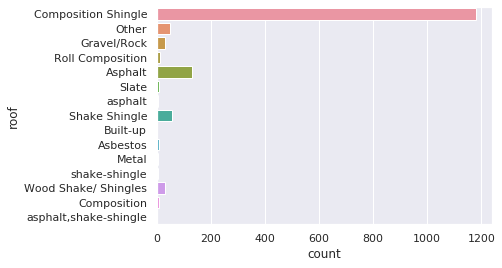

In [0]:
# Class distributions for 'roof'
sns.countplot(y='roof', data=df)
plt.show()

#### Using the series' `replace()` method replace `asphalt` with `Asphalt` 

In [0]:
# 'asphalt' should be 'Asphalt'
df['roof'].replace('asphalt', 'Asphalt', inplace=True)

#### Replace 'shake-shingle', 'Ashpalt, shake-shingle', 'asphalt,shake-shingle' with the value 'Shake Shingle'

We will do this by providing a list of values, values being the column (series) names, as an argument to the `to_replace` parameter

#### For Example:
```python 
df['feature'].replace(to_replace = ['a_desired_value_to_replace', 'another_desired_value_to_replace'], value = 'desired_value', inplace=True)
```

In [0]:
# 'shake-shingle' and 'asphalt,shake-shingle' should be 'Shake Shingle'
df['roof'].replace(to_replace=['shake-shingle', 'ashpalt, shake-shingle', 'asphalt,shake-shingle'], value='Shake Shingle', inplace=True)

#### Using seaborn's countplot, plot the `roof` distribution to see the changes 

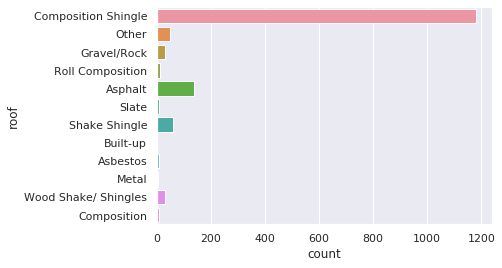

In [0]:
# Class distributions for 'roof'
sns.countplot(y='roof', data=df)
plt.show()

### Clean-up `exterior_walls`

Finally, we'll check for mislabeled classes. Typically knowing that we have mislabeled values (classes) comes from domain knowledge.

#### Plot the class distributions for <code style="color:steelblue">'exterior_walls'</code>.

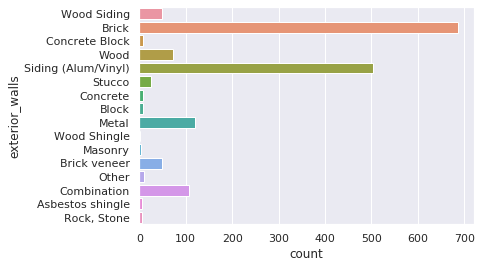

In [0]:
# Class distributions for 'exterior_walls'
sns.countplot(y='exterior_walls', data=df)
plt.show()

Let's fix these in the next exercise:
* <code style="color:crimson">'Rock, Stone'</code> should be <code style="color:crimson">'Masonry'</code>
* <code style="color:crimson">'Concrete'</code> and <code style="color:crimson">'Block'</code> should both just be <code style="color:crimson">'Concrete Block'</code>

<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
## <span style="color:RoyalBlue">Exercise 2.1</span>

**First, replace any instances of <code style="color:steelblue">'Rock, Stone'</code> with <code style="color:steelblue">'Masonry'</code> instead.**
- Remember to do it inplace.
- Note: `Rock, Stone` is one value not two

In [0]:
# 'Rock, Stone' should be 'Masonry'
df['exterior_walls'].replace(to_replace='Rock, Stone', value='Masonry', inplace=True )

**Next, replace any instances of <code style="color:steelblue">'Concrete'</code> or <code style="color:steelblue">'Block'</code> with <code style="color:steelblue">'Concrete Block'</code> instead.**
* Remember to do it inplace.

In [0]:
# 'Concrete' and 'Block' should be 'Concrete Block'
df['exterior_walls'].replace(to_replace=['Concrete', 'Block'], value='Concrete Block', inplace=True )

**Finally, plot the bar plot of <code style="color:steelblue">'exterior_walls'</code> to see its new distribution.**

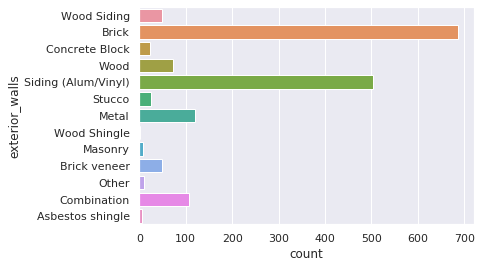

In [0]:
# Class distributions for 'exterior_walls'
sns.countplot(y='exterior_walls', data=df)
plt.show()

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">

<div style="text-align:center; margin: 40px 0 40px 0;">
    
[**Back to Contents**](#toc)
</div>

<br id="outliers">

## Remove unwanted outliers

An **outlier** is a data point that differs significantly from other observations in a dataset. An outlier may be due to variability in a measurement or it may indicate that there was an experimental error. An outlier can cause serious problems if not evaluated and addressed.

A **target variable** is the variable whose values are to be modeled and predicted by other variables. Those variables, called “predictor variables” are variables whose values will be used to predict the value of the target variable.
Outliers can cause problems with certain types of models.

<br>

### Analyze the box plot of your target variable, since that's the variable that you're actually trying to predict.

#### Note:
- Our target variable is `tx_price`

#### Use the seaborn's boxplot and violinplot functions to show distribution of the `tx_price` column. 

#### To show multiple plots on a single figure alter the following generic code:

```python 
# Import the matplotlib.pyplot submodule and name it plt
import matplotlib.pyplot as plt
 
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Style Seaborn figure To Have White Background
sns.set_style('whitegrid') 

# Plot graphs on axes
left_plot = sns.countplot(x='feature_name', data=df, ax=ax[0])
right_plot = sns.violinplot(x='feature_name', data=df, ax=ax[1])

# setup labels for left graph
ax[0].set_title("Title Of Graph")
ax[0].set_xlabel('x_label')
ax[0].set_ylabel('y_label')

# setup labels for right graph
ax[1].set_title("Title Of Graph")
ax[1].set_xlabel('x_label')
ax[1].set_ylabel('y_label')

# Add space between plots
fig.tight_layout() 
```

#### sns.boxplot() and sns.violin() parameters:
- `x` (string): axis parameter provide the numerical column (series) name
- `y` (optional) (string): axis parameter provide the categorical column (series) name
- `data` (DataFrame): Dataset for plotting
- `ax`  ( optional) (matplotlib Axes): Axes object to draw the plot onto, otherwise uses the current Axes.

<br>

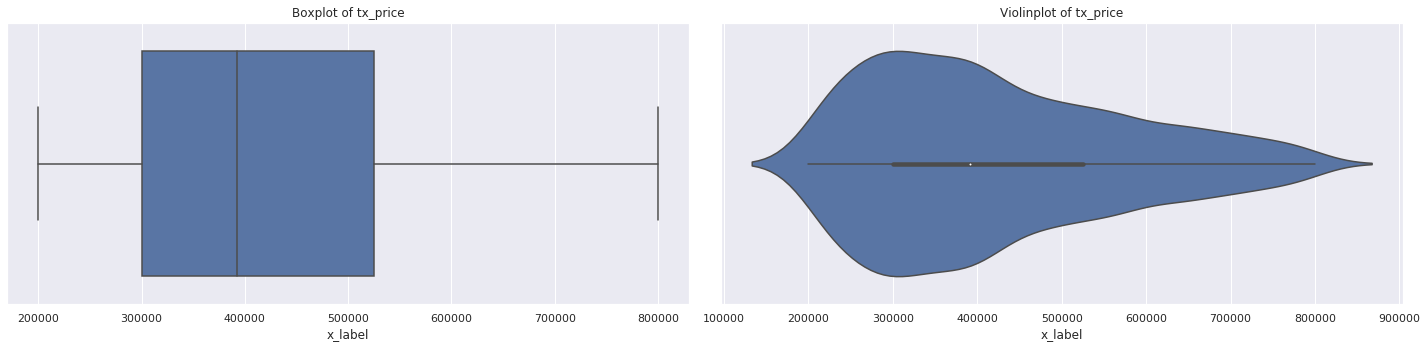

In [0]:
# Import the matplotlib.pyplot submodule and name it plt
import matplotlib.pyplot as plt
 
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Style Seaborn figure To Have White Background
sns.set_style('whitegrid') 

# plot graphs on axes
left_plot = sns.boxplot(x='tx_price', data=df, ax=ax[0])
right_plot = sns.violinplot(x='tx_price', data=df, ax=ax[1])

# setup labels for left graph
ax[0].set_title("Boxplot of tx_price")
ax[0].set_xlabel('x_label')

# setup labels for right graph
ax[1].set_title("Violinplot of tx_price")
ax[1].set_xlabel('x_label')

# add space between plots
fig.tight_layout() 

#### What's the difference between box plots and violin plots?

A Violin Plot is similar to a boxplot except we see the distributions in a different representation as well as the IQR and Median markers.

<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
## <span style="color:RoyalBlue">Exercise 2.2</span>

**Plot the violin plots for <code style="color:steelblue">'beds'</code>, <code style="color:steelblue">'sqft'</code>, and <code style="color:steelblue">'lot_size'</code> on a single figure**

##### Feel free to reference the code above 

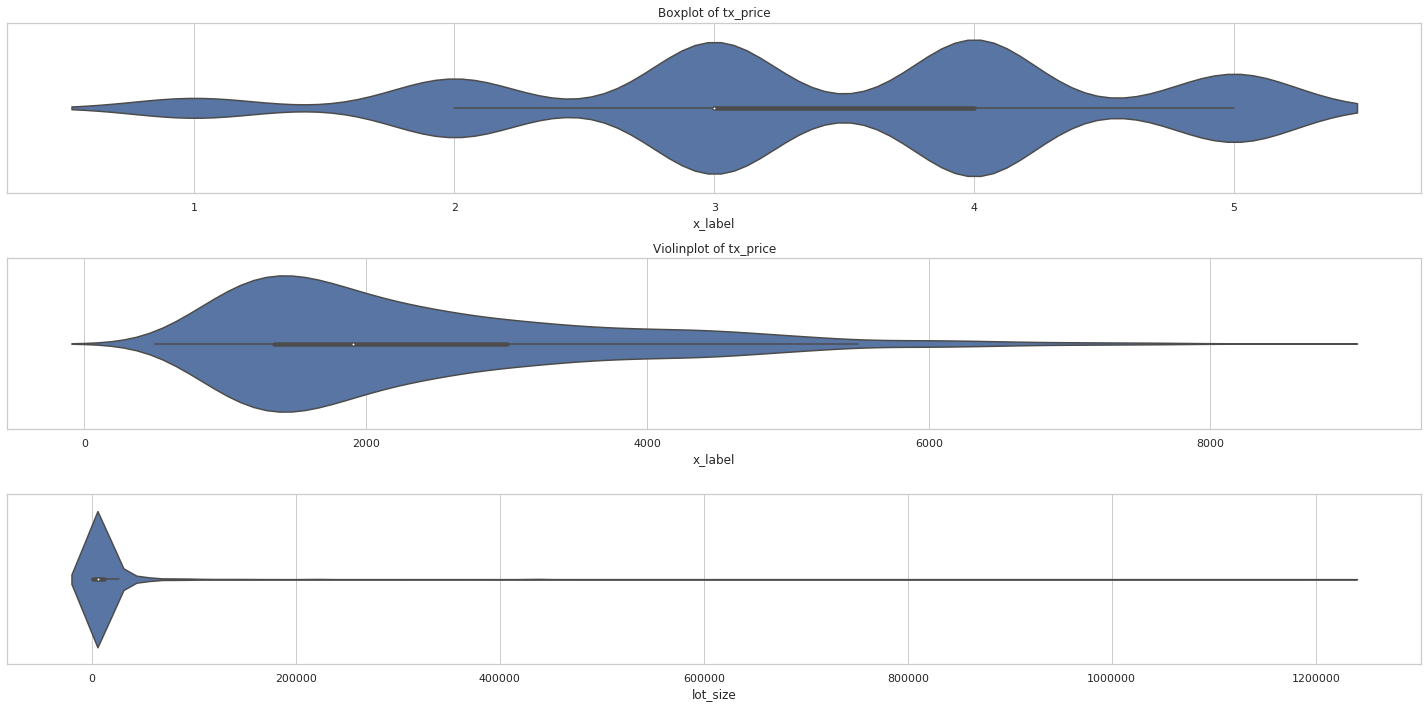

In [0]:
# Import the matplotlib.pyplot submodule and name it plt
import matplotlib.pyplot as plt
 
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20, 10))

# Style Seaborn figure To Have White Background
sns.set_style('whitegrid') 

# plot graphs on axes
top_plot = sns.violinplot(x='beds', data=df, ax=ax[0])
middle_plot = sns.violinplot(x='sqft', data=df, ax=ax[1])
bottom_plot = sns.violinplot(x='lot_size', data=df, ax=ax[2])

# setup labels for left graph
ax[0].set_title("Boxplot of tx_price")
ax[0].set_xlabel('x_label')

# setup labels for right graph
ax[1].set_title("Violinplot of tx_price")
ax[1].set_xlabel('x_label')

# rotate the x_labels by 45 degrees counter-clockwise
left_plot.set_xticklabels(left_plot.get_xticklabels(), rotation=10)
right_plot.set_xticklabels(right_plot.get_xticklabels(), rotation=10)

# add space between plots
fig.tight_layout() 

Among those three features, it looks like <code style="color:steelblue">lot_size</code> has a potential outlier! 
* Look at its long and skinny tail.
* Let's look at the largest 5 lot sizes just to confirm.

<br>

**Sort <code style="color:steelblue">df['lot_size']</code> and display the top 5 samples.**
* You can sort a Series with the <code style="color:steelblue">.sort_values()</code> function.

#### DataFrames `sort_values()` parameters:
- `ascending` (boolean): By default, it's True

**Tip:** You can chain functions together. For example print the head of the return value of `.sort_values()`

In [0]:
# Sort df.lot_size and display the top 5 samples
df['lot_size'].sort_values(ascending=False).head()

102     1220551
1111     436471
1876     436035
1832     436035
1115     435600
Name: lot_size, dtype: int64

The largest property has a lot_size of 1,220,551 sqft. The next largest has a lot_size of only 436,471 sqft. Holy smokes!

Because it's unlikely the REIT will ever invest in properties with lots that large, and because it's the only one in the dataset, let's remove it so it doesn't interfere with our ability to model normal size properties.

<br>

**Remove observations with <code style="color:steelblue">lot_size</code> greater than 500,000 sqft.**
- use a boolean mask (series) to filter the observations that match the condition of only selecting properties with sqft being greater that 500,000  (filter to keep only wanted observations)
* Overwrite the existing <code style="color:steelblue">df</code> object
* Print the length of the new <code style="color:steelblue">df</code> object.

In [0]:
# Remove lot_size outliers
df = df[df['lot_size'] < 500000]
# print length of df
df.shape

(1882, 26)

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">

<div style="text-align:center; margin: 40px 0 40px 0;">
    
[**Back to Contents**](#toc)
</div>

## Correct undefined or inconsistent data values

<hr>

<br id="missing-categorical">

## Label missing categorical data

It's finally time to address missing data.

<br>

#### Find and count the missing categorical data.
- use the DataFrame's `select_dtypes()` method to get a new DataFrame with only categorical features (series, columns)
- invoke the DataFrames `isnull()` method on the return value of the `select_dtypes()` mehod
- invoke the DataFrame's `sum()` method on the return of the `isnull()` method to sum up the amount of null values in each respective column

#### Note we are method chaining to get the result of finding the count of the missing categorical values

In [0]:
# Display number of missing values by feature (categorical)
df.select_dtypes(include=['object']).isnull().sum()

property_type       0
exterior_walls    223
roof              353
dtype: int64

<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
## <span style="color:RoyalBlue">Exercise 2.3</span>

**Write a loop that fills all the missing values for categorical features with the value <code style="color:steelblue">'Missing'</code>.**
* **Tip:** There's a shortcut for looping through categorical column names:


<pre style="color:#bbb">
for column_name in <strong style="color:steelblue">df.select_dtypes(include=['object'])</strong>:
    # code block
</pre>

In [0]:
# fill missing categorical values
for column_name in df.select_dtypes(include=['object']):
    df[column_name] = df[column_name].fillna('Missing')

**Now, display the number of missing values for each categorical feature.**

In [0]:
# Display number of missing values by feature (categorical)
df.select_dtypes(include=['object']).isnull().sum()

property_type     0
exterior_walls    0
roof              0
dtype: int64

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">

<div style="text-align:center; margin: 40px 0 40px 0;">
    
[**Back to Contents**](#toc)
</div>

<br id="missing-numeric">

## Flag and fill missing numeric data

Finally, let's flag and fill missing numeric data.

<br>
First, let's find and count missing values in numerical feature.

In [0]:
# Display number of missing values by feature (numeric)
df.select_dtypes(exclude=['object']).isnull().sum()

tx_price              0
beds                  0
baths                 0
sqft                  0
year_built            0
lot_size              0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
tx_year               0
dtype: int64

Well, it looks like we don't have any numerical features with missing values in this dataset.


<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
    
[**Back to Contents**](#toc)
</div>

<br>

### Finally, let's save the cleaned dataframe.

Let's save the new dataframe we worked hard to clean.
- We'll use Pandas's <code style="color:steelblue">.to_csv()</code> function
- Pass in the value None as an argument to the `index` parameter, so that Pandas drops the indices and only stores the actual data in the CSV.

#### DataFrame's `to_csv()` Method Parameters:
- `path` (string): File path of where to store DataFrame, if None is provided the result is returned as a string
- `index` (boolean or None): default True, Write row names (index).




In [0]:
# Save cleaned dataframe to new file
df.to_csv('cleaned_real_estate.csv', index=None)

OSError: ignored

Now we have a clean dataset <code style="color:steelblue">'cleaned_real_estate.csv'</code> to use in the future!

<br>

Congratulations for making through the Data Cleaning lesson!

As a reminder, here are a few things you did in this lesson:
* You confirmed that the dataset doesn't have any duplicate and irrelevant observations.
* You fixed various structural errors, such as mislabeled classes.
* You removed an outlier after plotting violin plots.
* And you labeled missing data in your categorical features.

All of this cleaning will be extremely helpful. In the next lesson, <span style="color:royalblue">Lesson 3: Feature Engineering</span>, you'll use your cleaned dataset to create new features that will improve model performance.

<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
    
[**Back to Contents**](#toc)
</div>